\newpage

# Project: YouTube Video Recommendation System

In this project, we developed a **content-based recommendation system** to suggest relevant YouTube videos based on their **titles** and **descriptions**. Our goal was to create a system that could recommend videos similar in content and themes, without relying on user interaction data like views, likes, or ratings. Below is a comprehensive overview of the project's steps and key components.

#### Data Overview
The dataset we worked with contained basic metadata for YouTube videos, including:
- **Video ID**: A unique identifier for each video.
- **Title**: A brief textual representation of the video’s content.
- **Description**: A more detailed summary providing context about the video.
- **Category**: The classification of the video (e.g., Education).

The lack of user interaction data prompted us to focus exclusively on **content-based filtering** techniques to generate recommendations.

#### Methodology
Our approach to building the recommendation system involved several key steps:

1. **Data Preprocessing**:
   We began by **cleaning the textual data** in the `Title` and `Description` fields. Special characters and HTML entities were removed to avoid errors in later stages. The cleaned data provided a clear, structured basis for further processing.

2. **TF-IDF Vectorization**:
   To numerically represent the cleaned text data, we employed **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorization. This method allowed us to capture the relative importance of words in the titles and descriptions, creating vectors that quantified the textual content of each video.

3. **Cosine Similarity Calculation**:
   Using the generated TF-IDF vectors, we calculated the **cosine similarity** between videos. Cosine similarity measures the textual similarity between video pairs, providing a foundation for making content-based recommendations.

4. **Recommendation System**:
   We implemented a recommendation function that, for any given video, retrieves the most similar videos based on cosine similarity scores. This function enabled us to generate relevant and thematic recommendations for the user.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/Users/yuyao/Desktop/YoutubeVideos_data.csv')
# Drop Unnecessary column
data=data.drop('Unnamed: 0',axis=1)

# Filling Null Values
data['Description']=data['Description'].fillna(' ')


print(data.head())
print(data.info())  



      Video Id                                              Title  \
0  S294zRodS_4   Education In Society: Crash Course Sociology #40   
1  HndV87XpkWg                          What&#39;s Education For?   
2  iwSOeRcX9NI  Why e-learning is killing education | Aaron Ba...   
3  zDZFcDGpL4U          RSA ANIMATE: Changing Education Paradigms   
4  T-JVpKku5SI  The problem of education inequality | CNBC Rep...   

                                         Description   Category  
0  Today we'll explore the history of education a...  Education  
1  The greatest problem of the modern education s...  Education  
2  Education at scale doesn't have to suck. If yo...  Education  
3  This RSA Animate was adapted from a talk given...  Education  
4  The Covid-19 pandemic has highlighted educatio...  Education  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 

### Exploratory Data Analysis (EDA) Introduction

This section presents an Exploratory Data Analysis (EDA) of a YouTube video dataset, focusing on key metadata such as video titles, descriptions, and categories. The goal is to identify patterns that can inform the development of a recommendation system.

#### 1. **Title Length Distribution**  
Analyzing the length of video titles helps reveal common trends in how creators structure their titles to attract viewers. Understanding whether shorter or more descriptive titles dominate can offer insights into viewer engagement strategies.

#### 2. **Description Length Distribution**  
Video descriptions provide additional context. By examining their length, we can see how much detail creators tend to include and whether longer descriptions contribute to viewer understanding and interaction.

#### 3. **Word Cloud for Titles and Descriptions**  
Word clouds were generated to highlight frequently used terms in both video titles and descriptions. These visualizations provide insights into the prevalent themes and keywords, which can be useful for content-based recommendations.

#### 4. **Category Distribution**  
Analyzing the distribution of video categories sheds light on the content diversity in the dataset. This understanding helps in segmenting videos for more personalized recommendations based on user preferences.


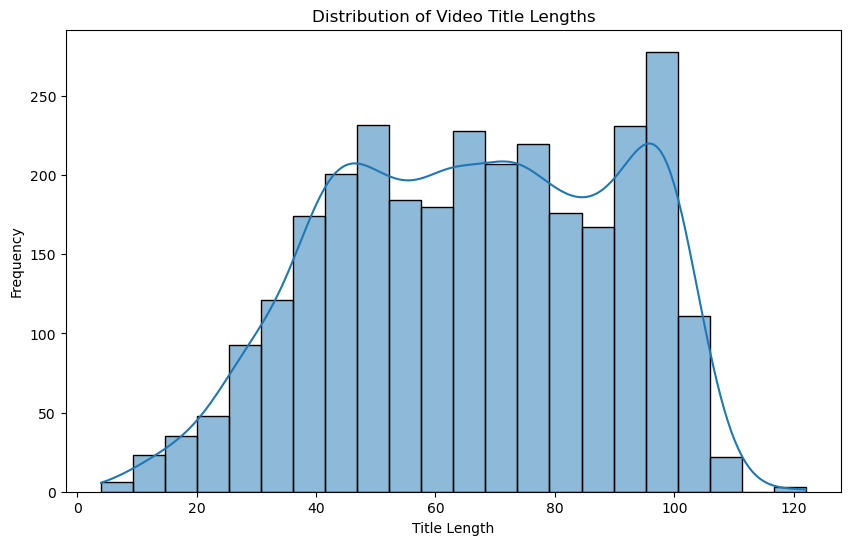

In [3]:
# 计算标题的长度
data['title_length'] = data['Title'].apply(len)

# 可视化标题长度的分布
plt.figure(figsize=(10,6))
sns.histplot(data['title_length'], kde=True)
plt.title('Distribution of Video Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()


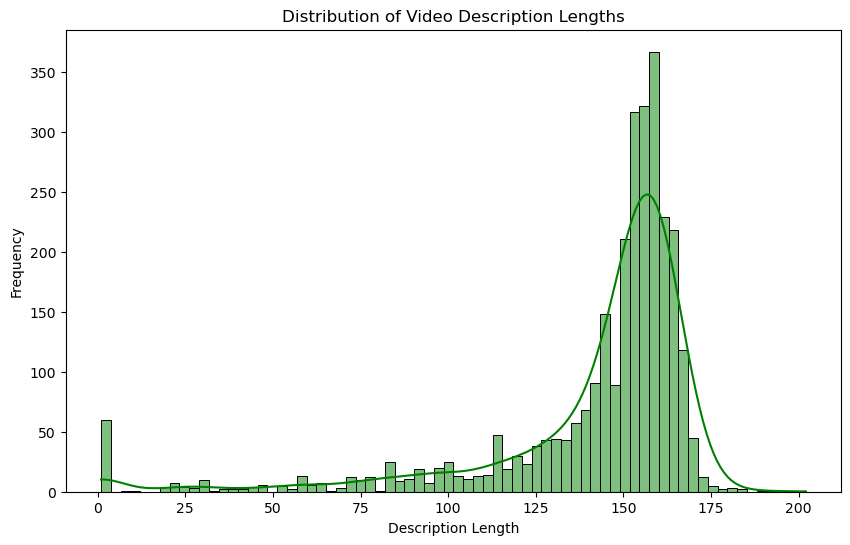

In [4]:
# 计算描述的长度
data['description_length'] = data['Description'].apply(len)

# 可视化描述长度的分布
plt.figure(figsize=(10,6))
sns.histplot(data['description_length'], kde=True, color='green')
plt.title('Distribution of Video Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()


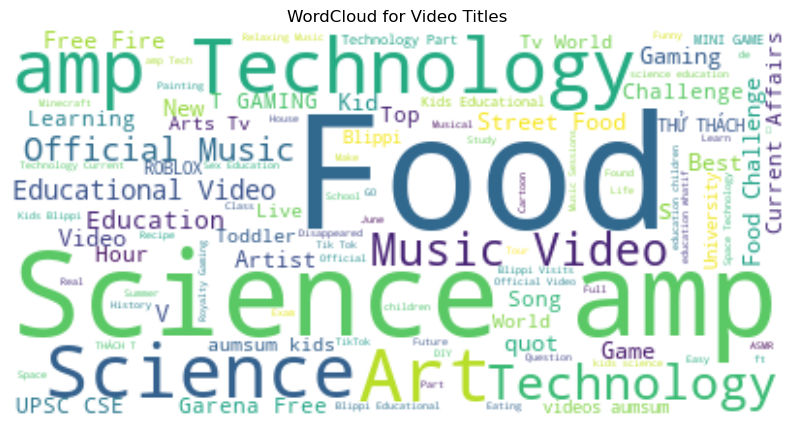

In [5]:
# 导入词云库
from wordcloud import WordCloud

# 将所有标题连接起来形成一个大的文本
text = " ".join(title for title in data['Title'])

# 生成词云
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# 可视化词云
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Video Titles')
plt.show()


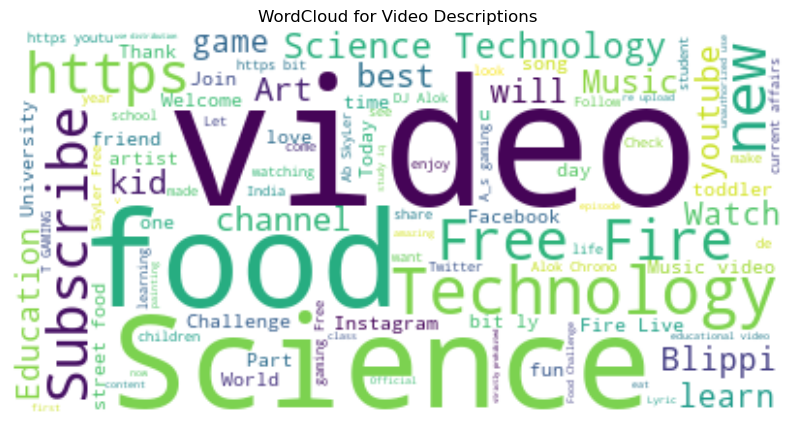

In [6]:
# 将所有描述连接成一个文本
desc_text = " ".join(description for description in data['Description'])

# 生成词云
wordcloud_desc = WordCloud(max_words=100, background_color="white").generate(desc_text)

# 可视化描述词云
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_desc, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Video Descriptions')
plt.show()


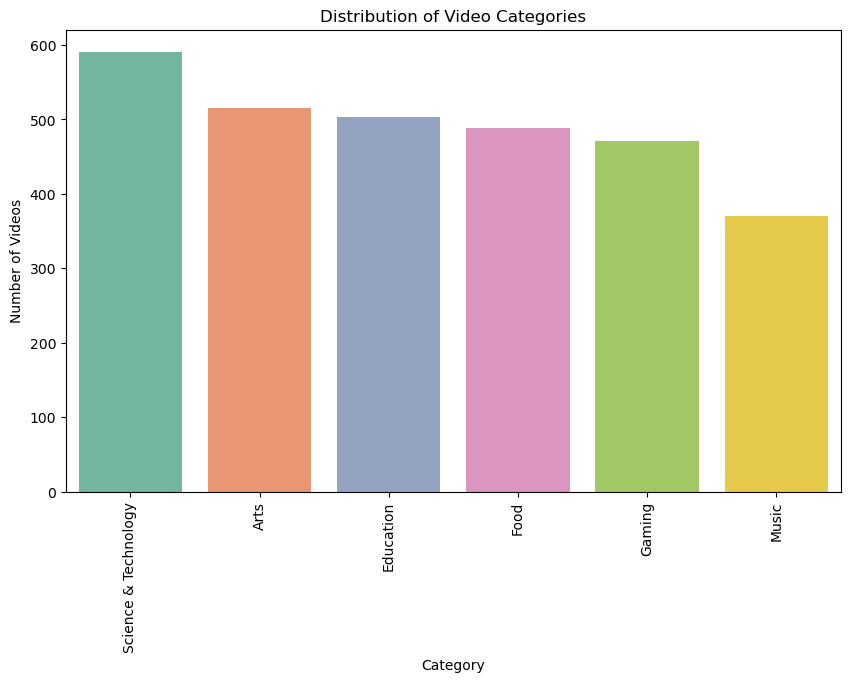

In [7]:
# 统计每个类别的视频数量
category_counts = data['Category'].value_counts()

# 可视化视频类别的分布
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title('Distribution of Video Categories')
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=90)
plt.show()


Advanced techniques like **Topic Modeling** and **Sentiment Analysis** are often used in Exploratory Data Analysis (EDA) when dealing with textual data, like video descriptions in our case. These methods go beyond basic statistical summaries and visualizations to provide deeper insights into the **themes** and **sentiments** underlying the text. Here are a few more advanced methods we can use to analyze video descriptions or titles.

### 1. **Topic Modeling (LDA - Latent Dirichlet Allocation)**

Topic modeling is a natural language processing (NLP) technique used to discover hidden thematic structures within text data. In our case, topic modeling can be applied to video descriptions to find clusters of related words that represent different themes or topics.


In [10]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Preprocessing the descriptions
stop_words = set(stopwords.words('english'))
data['processed_desc'] = data['Description'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word not in stop_words and word not in string.punctuation]))

# Create a dictionary and corpus for LDA
texts = [text.split() for text in data['processed_desc']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Run LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Display the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.046*"..." + 0.011*"\'s" + 0.011*"https" + 0.010*"food" + 0.010*"video"')
(1, '0.034*"..." + 0.032*"gaming" + 0.018*"blippi" + 0.011*"game" + 0.010*"video"')
(2, '0.039*"..." + 0.019*"science" + 0.018*"technology" + 0.016*"free" + 0.014*"live"')
(3, '0.076*"--" + 0.040*"..." + 0.030*"science" + 0.029*"technology" + 0.012*"upsc"')
(4, '0.032*"..." + 0.013*"music" + 0.012*"https" + 0.008*"use" + 0.008*"video"')


Here, LDA will generate several topics (e.g., 5 topics) from the video descriptions, and each topic will be defined by a set of key terms. 


- **Topic Number**: Each result starts with a number in parentheses (e.g., `0`, `1`, `2`, etc.), which corresponds to a specific topic identified by the LDA model.
  
- **Word Probabilities**: Each topic is followed by a set of words and associated probabilities (e.g., `0.046*"..." + 0.011*"'s" + 0.011*"https"`). These are the most frequent words in that topic, with their probabilities indicating how strongly they are associated with the topic.
  
    - For instance, in topic 0 (`0.046*"..." + 0.011*"'s" + 0.011*"https"`), the most common word is `"..."` with a probability of `0.046`. This means the word `"..."` appears frequently in descriptions that are part of this topic.
  
    - Similarly, in topic 1 (`0.034*"..." + 0.032*"gaming"`), the word `"gaming"` has a probability of `0.032`, suggesting this topic is likely related to **gaming content**.

### Explanation of Each Topic:
- **Topic 0**: The words in this topic include `"..."`, `"'s"`, `"https"`, `"food"`, and `"video"`. These are somewhat general terms, and `"https"` might indicate links included in descriptions. This could suggest a variety of videos that may not focus on a specific theme.
  
- **Topic 1**: The word `"gaming"` appears with a relatively high probability, along with words like `"blippi"` (possibly referring to a popular children’s YouTuber) and `"game"`. This topic is likely centered around **gaming content** or **children’s entertainment**.

- **Topic 2**: This topic includes words like `"science"`, `"technology"`, `"free"`, and `"live"`, suggesting a theme focused on **science, technology, and educational videos**.

- **Topic 3**: Similar to topic 2, this one contains `"science"`, `"technology"`, and `"upsc"` (possibly referring to the UPSC exam, a major public service exam in India). This topic seems to be related to **science, technology, and education, potentially with a focus on exam preparation**.

- **Topic 4**: This topic includes `"music"`, `"https"`, and `"video"`. It could indicate a general theme, with some focus on **music videos or multimedia content**.

### In Summary:
Each **topic** represents a group of words that frequently occur together across different video descriptions. The LDA model attempts to cluster related words into topics, which reflect underlying themes in the dataset. Based on the output, we have a variety of topics including **gaming**, **science and technology**, **music**, and more general or mixed content. These topics can help in classifying and recommending content based on thematic similarity.



### 2. **Sentiment Analysis**

Sentiment Analysis can help determine whether the tone of video descriptions is positive, negative, or neutral. This can be particularly useful when we are trying to understand how the sentiment of video descriptions relates to viewer engagement (e.g., videos with positive descriptions might receive more views or likes).



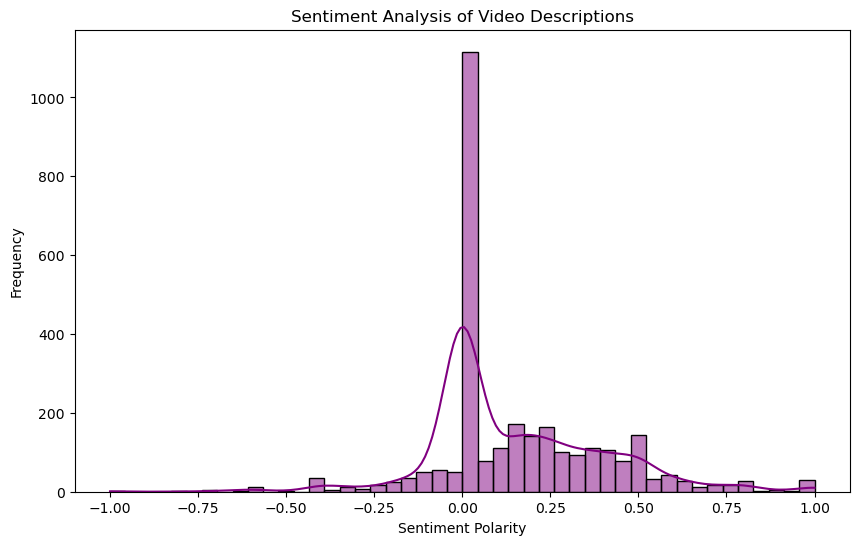

In [11]:
from textblob import TextBlob

# Apply sentiment analysis to the descriptions
data['sentiment'] = data['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sentiment ranges from -1 (negative) to 1 (positive)
plt.figure(figsize=(10,6))
sns.histplot(data['sentiment'], kde=True, color='purple')
plt.title('Sentiment Analysis of Video Descriptions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


This sentiment analysis histogram shows the distribution of polarity scores for video descriptions, ranging from -1 (most negative) to 1 (most positive). The majority of descriptions cluster around a neutral sentiment, with a large spike at 0, indicating many descriptions are neither explicitly positive nor negative. However, there are more positive descriptions than negative ones, as evidenced by the skew towards the right side of the plot. This suggests that, while most descriptions are neutral, videos generally have a more positive tone in their descriptions.

### 3. **Named Entity Recognition (NER)**

Named Entity Recognition identifies entities such as people, organizations, locations, and other important entities mentioned in video descriptions. This can help us identify key topics or themes based on important real-world entities.



In [18]:
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Apply NER to descriptions
data['entities'] = data['Description'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

# Display a sample
print(data[['Title', 'entities']].head())



                                               Title  \
0   Education In Society: Crash Course Sociology #40   
1                          What&#39;s Education For?   
2  Why e-learning is killing education | Aaron Ba...   
3          RSA ANIMATE: Changing Education Paradigms   
4  The problem of education inequality | CNBC Rep...   

                                           entities  
0                        [(Today, DATE), (US, GPE)]  
1                                                []  
2                                                []  
3  [(RSA, ORG), (Ken Robinson, PERSON), (RSA, ORG)]  
4               [(CNBC, ORG), (Tom Chitty, PERSON)]  



### Analysis of NER Results:

1. **"Education In Society: Crash Course Sociology #40"**
   - **Entities**: `[(Today, DATE), (US, GPE)]`
   - **Interpretation**: The NER model recognized two entities:
     - `"Today"` is classified as a **DATE**, indicating the text contains a reference to time.
     - `"US"` is recognized as a **GPE** (Geopolitical Entity), indicating a reference to the United States.
   - **Context**: This suggests that the description might be discussing the current state of education in the US or making a general reference to education's relationship with the society in a specific time period.

2. **"What's Education For?"**
   - **Entities**: `[]` (Empty)
   - **Interpretation**: No entities were detected in this description.
   - **Context**: The description might be too abstract or general, lacking specific references to people, places, or organizations that NER could identify. It may simply pose philosophical questions or offer broad statements about education.

3. **"Why e-learning is killing education | Aaron Barth | TEDxLangaraCollege"**
   - **Entities**: `[]` (Empty)
   - **Interpretation**: Again, no entities were detected.
   - **Context**: Despite referencing an individual, `"Aaron Barth"`, and `"TEDxLangaraCollege"`, the NER model did not detect these as entities, which could indicate a limitation in entity recognition for certain proper nouns or named events.

4. **"RSA ANIMATE: Changing Education Paradigms"**
   - **Entities**: `[(RSA, ORG), (Ken Robinson, PERSON), (RSA, ORG)]`
   - **Interpretation**: The entities identified are:
     - `"RSA"` as an **ORG** (organization), recognized twice, indicating the involvement of the RSA organization.
     - `"Ken Robinson"` as a **PERSON**, suggesting that the description refers to this individual, who is well-known for his talks on education.
   - **Context**: This description mentions a specific organization and an individual known for his influence on education, signaling that the video content likely revolves around educational reforms and discussions led by or related to Ken Robinson and the RSA.

5. **"The problem of education inequality | CNBC Report | Tom Chitty"**
   - **Entities**: `[(CNBC, ORG), (Tom Chitty, PERSON)]`
   - **Interpretation**: The entities recognized here are:
     - `"CNBC"` as an **ORG**, indicating that this video involves a news report from the well-known organization CNBC.
     - `"Tom Chitty"` as a **PERSON**, likely the reporter or presenter of the piece.
   - **Context**: This description points to a specific news report on the topic of educational inequality, featuring a correspondent from CNBC. The NER model correctly identifies both the news organization and the individual.

### Summary:
The NER model effectively extracts key **dates**, **organizations**, and **people** from the video descriptions, providing insights into the content. Videos with named entities like `"Ken Robinson"`, `"RSA"`, or `"CNBC"` suggest that the video content is likely tied to well-known individuals or organizations, potentially making these videos more authoritative or specialized.

For descriptions where no entities are detected, the content may be more general or abstract, lacking direct references to specific people, organizations, or places. This highlights areas where entity detection is not as useful, but the videos may still focus on broad educational themes.

### 4. **Text Clustering with TF-IDF and K-Means**

Instead of topic modeling, we can also use **TF-IDF (Term Frequency-Inverse Document Frequency)** combined with **K-Means Clustering** to group descriptions into clusters based on their textual similarity.





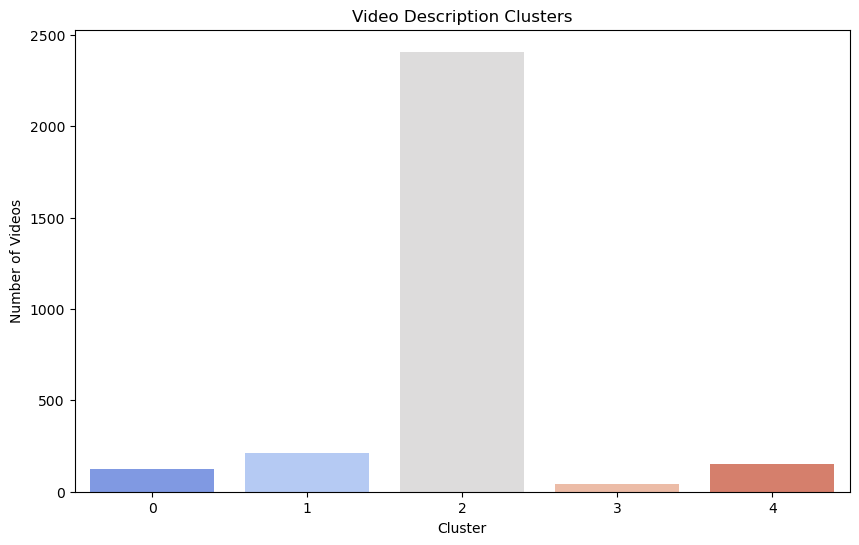

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['processed_desc'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Add the cluster labels to the dataframe
data['cluster'] = kmeans.labels_

# Visualize the clustering results
plt.figure(figsize=(10,6))
sns.countplot(x='cluster', data=data, palette='coolwarm')
plt.title('Video Description Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Videos')
plt.show()



This bar chart represents the clustering of video descriptions into five distinct groups (clusters). Cluster 2 dominates with the largest number of videos, suggesting a common theme or pattern across these descriptions. The other clusters (0, 1, 3, and 4) contain significantly fewer videos, indicating more specific or less frequent themes. This imbalance suggests that most videos share similar descriptive content, while a minority falls into more niche or unique categories. 

### 5. **Word Embedding and Dimensionality Reduction (t-SNE)**

Word embeddings like **Word2Vec** or **GloVe** can be used to convert textual data into numerical vectors that capture the semantic meaning of words. Using **t-SNE** (t-distributed Stochastic Neighbor Embedding), we can visualize high-dimensional textual data in a 2D space, helping identify clusters or trends in the data.



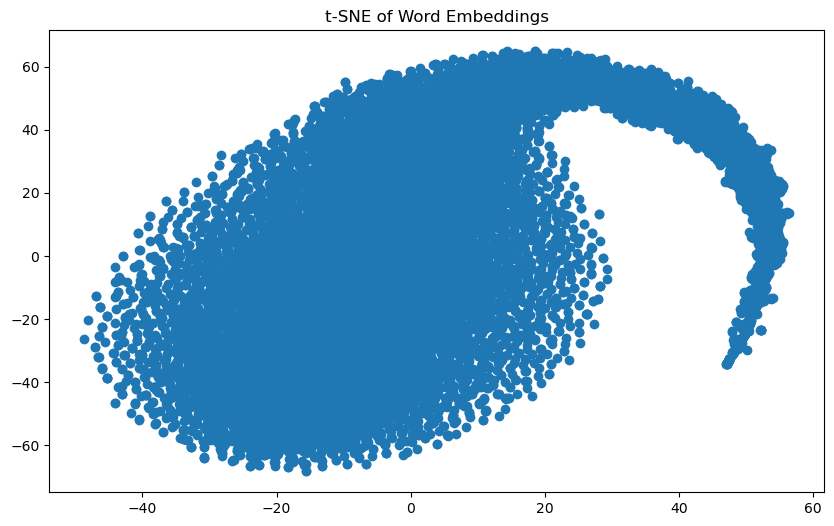

In [16]:
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Train Word2Vec model on the tokenized descriptions
model = Word2Vec(texts, vector_size=100, window=5, min_count=1, workers=4)

# Extract word vectors
word_vectors = model.wv

# Reduce dimensions with t-SNE for visualization
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(word_vectors.vectors)

# Plot the t-SNE result
plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE of Word Embeddings')
plt.show()


This t-SNE plot visualizes the high-dimensional word embeddings of video descriptions, reduced to two dimensions. The dense clustering of points suggests that many words in the descriptions share similar semantic relationships, meaning they often occur in similar contexts. The formation of distinct shapes or curved patterns in the plot may indicate groups of words or themes that are semantically related, but with some variation. Overall, the visualization helps reveal patterns in word usage across the descriptions, which could inform content or topic-based analysis.


### Content-Based Filtering

Content-based filtering is a recommendation technique that relies on the **attributes** of the items being recommended. In this approach, recommendations are made based on the **similarity** between the content of the items (such as descriptions, titles, or other metadata) rather than user interaction data. This method is especially useful when user interaction data is limited or unavailable, as it focuses on the characteristics of the items themselves.

In our case, we applied **content-based filtering** to recommend YouTube videos using the **titles** and **descriptions** of each video. Here's a summary of the process:

1. **Data Preprocessing**: We combined the `Title` and `Description` of each video to create a text field that represents the content of the video more comprehensively. This helped capture the core information of each video.

2. **TF-IDF Vectorization**: We used **TF-IDF (Term Frequency-Inverse Document Frequency)** to convert the textual data into numerical vectors. TF-IDF is a widely used method that reflects how important a word is to a particular document (in this case, a video) relative to all other documents. This allowed us to quantify the similarity between different videos based on their text.

3. **Cosine Similarity**: After transforming the text into vectors, we computed **cosine similarity** to measure the similarity between videos. Videos with higher cosine similarity scores are considered more alike in terms of their content, which allowed us to recommend videos that are thematically similar.

4. **Recommendation Function**: We built a function that, given a specific video, returns a list of the most similar videos based on their cosine similarity scores. This simple yet effective approach provides recommendations that are closely related to the content the user has already viewed.

### Benefits:
- **No User Data Required**: Content-based filtering works solely on the characteristics of the items, making it ideal for scenarios where user interaction data (such as ratings or views) is not available.
- **Scalable to New Content**: Since the recommendations are based on the item's content, the system can easily recommend new videos without needing to wait for user feedback.

### Limitations:
- **Lack of Personalization**: Content-based filtering does not account for the unique preferences of individual users. It recommends similar content but may not capture the nuanced preferences of each user.
- **Narrow Recommendations**: Since the system recommends videos similar to the ones already consumed, it may fail to introduce diverse or exploratory content to users.





In [26]:
# Combine the title and description into one column for feature extraction
data['text'] = data['Title'] + ' ' + data['Description']

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the 'text' column into TF-IDF features
tfidf_matrix = tfidf.fit_transform(data['text'])

# Check the shape of the TF-IDF matrix (number of videos, number of features)
print(tfidf_matrix.shape)


(2940, 5000)


In [27]:
# Compute the cosine similarity between all videos
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Check the similarity matrix (it's a square matrix, number of videos x number of videos)
print(cosine_sim.shape)


(2940, 2940)


In [30]:
# Create a function to get video recommendations based on similarity scores
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the video that matches the title
    idx = data.index[data['Title'] == title].tolist()[0]
    
    # Get the pairwise similarity scores for that video with all others
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the videos based on the similarity scores (excluding the input video itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top 5 most similar videos (excluding the first one which is the video itself)
    sim_scores = sim_scores[1:6]
    
    # Get the video indices
    video_indices = [i[0] for i in sim_scores]
    
    # Return the titles of the top 5 most similar videos
    return data['Title'].iloc[video_indices]


In [31]:
# Test the system with an example video
recommended_videos = get_recommendations("Education In Society: Crash Course Sociology #40")
print("Recommended Videos for 'Education In Society: Crash Course Sociology #40':")
print(recommended_videos)

Recommended Videos for 'Education In Society: Crash Course Sociology #40':
207                            ELSA Reimagine Education 2
39                    The Problem With American Education
2025    Space Technology Class 1 ll అంతరిక్షం  ll Scie...
350                               Education Uninterrupted
168     #TGT_PGT_EXAM || अन्तिम 40 दिनों की रणनीति || ...
Name: Title, dtype: object


In [35]:
import re
from html import unescape

# Function to clean the text by removing HTML entities and special characters
def clean_text(text):
    # Unescape HTML entities like &#39; -> '
    text = unescape(text)
    
    # Remove any non-alphanumeric characters except spaces (optional)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Convert to lowercase (optional, depending on your use case)
    text = text.lower()
    
    return text

# Apply the cleaning function to both Title and Description columns
data['cleaned_text'] = data['Title'].apply(clean_text) + ' ' + data['Description'].apply(clean_text)

# Check cleaned text
print(data[['Title', 'cleaned_text']].head())


                                               Title  \
0   Education In Society: Crash Course Sociology #40   
1                          What&#39;s Education For?   
2  Why e-learning is killing education | Aaron Ba...   
3          RSA ANIMATE: Changing Education Paradigms   
4  The problem of education inequality | CNBC Rep...   

                                        cleaned_text  
0  education in society crash course sociology 40...  
1  whats education for the greatest problem of th...  
2  why elearning is killing education  aaron bart...  
3  rsa animate changing education paradigms this ...  
4  the problem of education inequality  cnbc repo...  


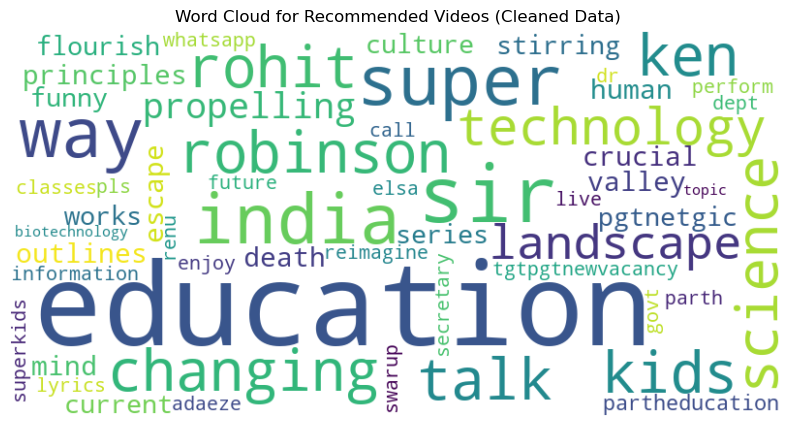

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine cleaned text from the recommended videos
recommended_text = " ".join(data.loc[data['Title'].isin(recommended_videos), 'cleaned_text'])

# Generate a word cloud using the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(recommended_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Recommended Videos (Cleaned Data)')
plt.show()


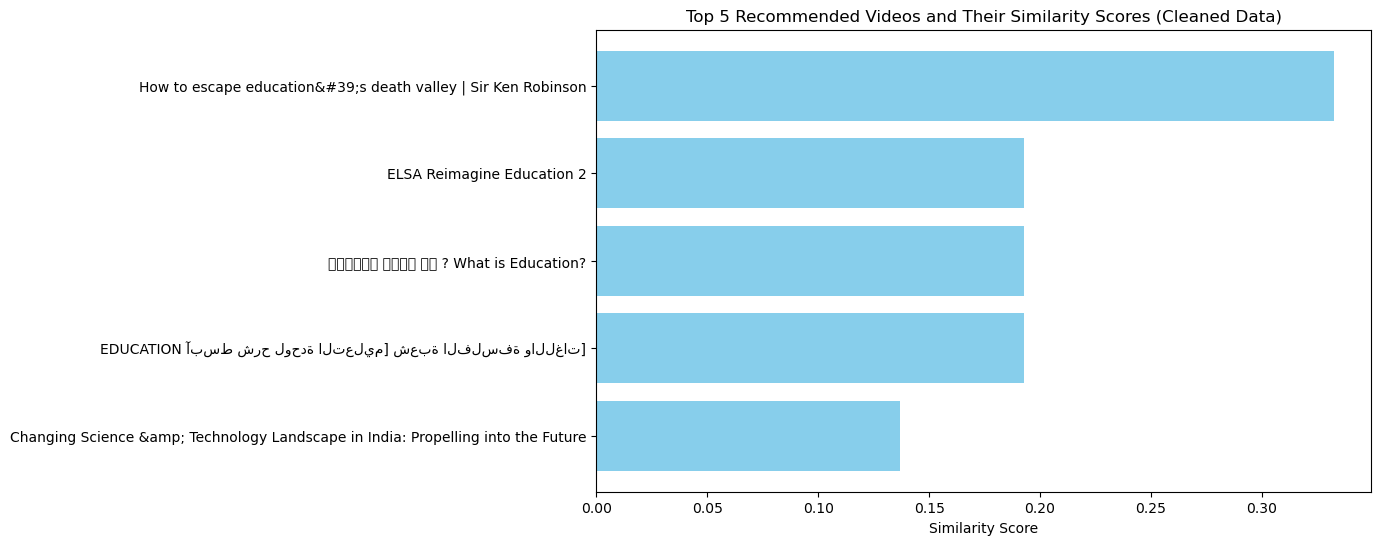

In [42]:
# Function to get top 5 recommended videos and their similarity scores
def get_recommendations_with_scores(title, cosine_sim=cosine_sim):
    idx = data.index[data['Title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Exclude the video itself
    
    # Get video indices and similarity scores
    video_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]
    recommended_titles = data['Title'].iloc[video_indices]
    
    return recommended_titles, scores

# Example: Get recommendations and their scores for a specific video
recommended_videos, scores = get_recommendations_with_scores("RSA ANIMATE: Changing Education Paradigms")

# Plot the similarity scores as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(recommended_videos, scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Top 5 Recommended Videos and Their Similarity Scores (Cleaned Data)')
plt.gca().invert_yaxis()  # Invert y-axis so highest score is at the top
plt.show()



#### Observations:
1. **Highest Similarity**: The video *"How to escape education&#39;s death valley | Sir Ken Robinson"* has the highest similarity score (around 0.32). This suggests that it shares significant thematic content or language with the target video, likely due to the common focus on **educational reform**.
   
2. **Moderate Similarity**: The next two videos, *"ELSA Reimagine Education 2"* and *"What is Education?"*, also show decent similarity (around 0.2), indicating related content, possibly discussing **educational innovation** or **philosophical themes in education**.

3. **Lower Similarity**: The last two videos, including one with garbled text, have lower similarity scores (around 0.1), suggesting weaker but still relevant thematic connections, possibly touching on broader **science and technology topics** rather than focusing purely on education.

Overall, the recommendations make sense, with videos that cover similar topics related to education reform and innovation.